#### 5주차 Assignment
Iris 데이터세트로 DNN 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yoojm/AIStudy/practice/Dataset/iris.csv")
df

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X = df.drop('label',axis=1)
X.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [6]:
y = df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [7]:
X = X.values

In [8]:
X

array([[0.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [1.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [3.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [4.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [5.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [6.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [7.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [8.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [9.00e+00, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.00e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.10e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.30e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.40e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.50e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.60e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((120, 5), (120,), (30, 5), (30,))

In [14]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(5,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 48        
                                                                 
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [15]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
4/4 [==============================] - 2s 148ms/step - loss: 1.5395 - mse: 1.5395 - val_loss: 0.5344 - val_mse: 0.5344
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6610 - mse: 0.6610 - val_loss: 0.4898 - val_mse: 0.4898
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.5371 - mse: 0.5371 - val_loss: 0.4406 - val_mse: 0.4406
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.4709 - mse: 0.4709 - val_loss: 0.3756 - val_mse: 0.3756
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 0.4109 - mse: 0.4109 - val_loss: 0.3880 - val_mse: 0.3880
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.3632 - mse: 0.3632 - val_loss: 0.2697 - val_mse: 0.2697
Epoch 7/10
4/4 [==============================] - 0s 23ms/step - loss: 0.3033 - mse: 0.3033 - val_loss: 0.2178 - val_mse: 0.2178
Epoch 8/10
4/4 [==============================] - 0s 14ms/step - loss: 0.2515 - mse: 0.2515 - va

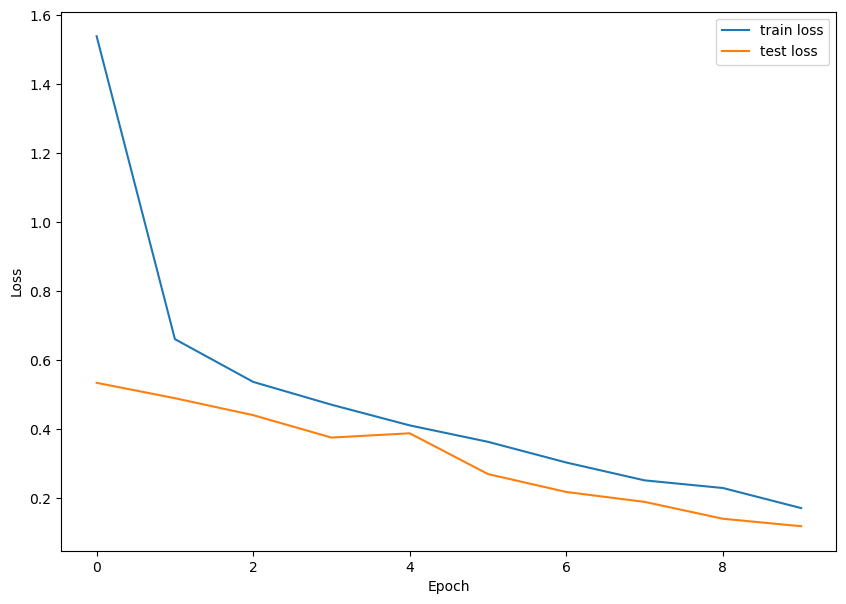

In [16]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: 0.1185 - mse: 0.1185


[0.11851223558187485, 0.11851223558187485]